In [2]:
import pandas as pd
data = pd.read_csv("hpi_master.csv")
data.head(24)

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.90,100.94
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.29,100.90
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.69,100.97
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.31,101.32
5,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,6,102.79,101.46
6,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,7,102.95,101.86
7,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,8,103.12,102.01
8,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,9,102.85,101.98
9,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,10,103.06,102.29


In [451]:
print(type(data))
print(data.columns)
print(type(data["yr"]))

<class 'pandas.core.frame.DataFrame'>
Index(['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name',
       'place_id', 'yr', 'period', 'index_nsa', 'index_sa'],
      dtype='object')
<class 'pandas.core.series.Series'>


In [452]:
print(max(data["yr"]) - min(data["yr"]))
#range of 49 years
len(data)

49


128142

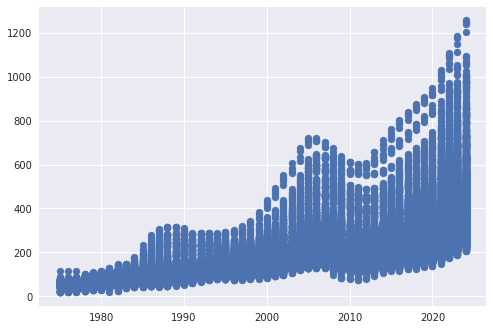

In [453]:
#compare index_nsa to yr in graph
import numpy as np
import matplotlib.pyplot as pp
homepriceIndex = np.array(data["index_nsa"])
year = np.array(data["yr"])
pp.scatter(year, homepriceIndex)

In [454]:
#now, find the mean nsa index for each year, and throw it in a line graph
means = pd.DataFrame({'Year': annum, 'Mean Index': np.mean(homepriceIndex[year == annum])} for annum in range(np.min(year), np.max(year)))
for annum in range(np.min(year), np.max(year)):
    print(f"{annum} average index {np.mean(homepriceIndex[year == annum])}")

1975 average index 58.71665467625899
1976 average index 54.52017857142857
1977 average index 54.93496282527882
1978 average index 59.21375533428166
1979 average index 65.43833333333333
1980 average index 69.41148188803513
1981 average index 73.19995545657015
1982 average index 73.97784272051011
1983 average index 77.13668615984406
1984 average index 79.17747529200359
1985 average index 81.71397840531561
1986 average index 85.23273054755042
1987 average index 88.37689788053952
1988 average index 91.7415202492212
1989 average index 95.58960365853657
1990 average index 98.44383928571428
1991 average index 100.70974021592444
1992 average index 103.38460543766577
1993 average index 106.15574967405475
1994 average index 109.78754521963825
1995 average index 112.79998176291794
1996 average index 116.70196601941747
1997 average index 120.38030596788852
1998 average index 126.07813559322035
1999 average index 132.0932627118644
2000 average index 139.85641583559988
2001 average index 149.5967240

In [455]:
#means.loc[means['Year'] == 2022, 'Mean Index'] = (means.loc[means['Year'] == 2023, 'Mean Index'].values[0]  + means.loc[means['Year'] == 2021, 'Mean Index'].values[0]) / 2
#Fill nan value with linear interpolation, allows us to use HPIs most recent data
means['Mean Index'] = means['Mean Index'].interpolate(method='linear')

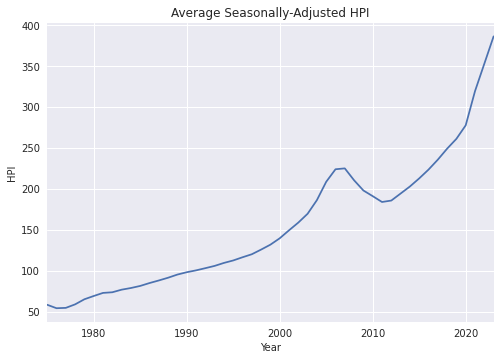

In [456]:
#Mean NSA Index since 1975, by year
pp.style.use('seaborn')
pp.plot(means['Year'], means['Mean Index'])
pp.xlabel('Year', fontsize=10)
pp.ylabel('HPI', fontsize=10)
pp.title('Average Seasonally-Adjusted HPI')
pp.xlim(1975, 2023)
pp.savefig('AverageNSA.svg')

In [3]:
realtorData = pd.read_csv("realtor-data.csv")
print(type(realtorData))

<class 'pandas.core.frame.DataFrame'>


In [4]:
realtorData.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [5]:
realtorData.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [6]:
realtorData[realtorData['state'] == "Massachusetts"][:10]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
3403,67832.0,for_sale,180000.0,2.0,1.0,0.34,732726.0,Agawam,Massachusetts,1001.0,676.0,NaN
3404,97400.0,for_sale,25000.0,NaN,NaN,3.41,1909493.0,Agawam,Massachusetts,1001.0,NaN,NaN
3405,58796.0,for_sale,169900.0,2.0,2.0,NaN,1194249.0,Agawam,Massachusetts,1001.0,892.0,2019-04-30
3406,8147.0,for_sale,242000.0,2.0,2.0,NaN,913299.0,Agawam,Massachusetts,1001.0,1428.0,NaN
3407,22700.0,for_sale,299950.0,2.0,2.0,NaN,560791.0,Agawam,Massachusetts,1001.0,1659.0,NaN
3408,22700.0,for_sale,239900.0,3.0,1.0,0.46,849166.0,Agawam,Massachusetts,1001.0,1196.0,NaN
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
3411,53016.0,for_sale,239900.0,2.0,3.0,NaN,384866.0,Agawam,Massachusetts,1001.0,1229.0,2016-06-07
3412,8147.0,for_sale,249900.0,2.0,1.0,NaN,531642.0,Agawam,Massachusetts,1001.0,860.0,1997-01-17


Here, we see that some of the features may contain NaN values -- in further analysis of our columns, we want to exclude these rows altogether.

In [7]:
realtorData.describe() 
#it appears that there are significant outliers, or errors in data collection
#Cannot use sklearn's IsolationForest for detecting outliers, since we are stuck on an older version

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [462]:
realtorData.quantile(0.995) #Consider everything beyond the 99.5th percentile as an unrealistic datapoint
#This will preserve high-end homes while excluding clear, 100-bedroom homes from our analysis

brokered_by    1.099830e+05
price          5.800000e+06
bed            8.000000e+00
bath           8.000000e+00
acre_lot       1.734804e+02
street         1.992389e+06
zip_code       9.901900e+04
house_size     8.000000e+03
Name: 0.995, dtype: float64

In [8]:
def dropAboveQuantile(df, cat, per):
    return df.drop(df[df[cat] > df[cat].quantile(per)].index)
def dropBelowQuantile(df, cat, per):
    return df.drop(df[df[cat] < df[cat].quantile(per)].index)

In [9]:
realtorData = dropAboveQuantile(realtorData, 'house_size', 0.995)
realtorData = dropBelowQuantile(realtorData, 'house_size', 0.005)

In [10]:
realtorData = dropAboveQuantile(realtorData, 'price', 0.995)
realtorData = dropBelowQuantile(realtorData, 'price', 0.005)

In [524]:
realtorData.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size,sqftCost
count,2.184679e+06,2.187593e+06,1.723837e+06,1.691061e+06,1.872077e+06,2.178931e+06,2.188847e+06,1.633378e+06,1.632454e+06
mean,5.296352e+04,4.579360e+05,3.251291e+00,2.459616e+00,1.376095e+01,1.011519e+06,5.217747e+04,1.978670e+03,2.659997e+02
std,3.063113e+04,5.254413e+05,1.374310e+00,1.450856e+00,7.401955e+02,5.832260e+05,2.891586e+04,9.854823e+02,2.322504e+02
min,0.000000e+00,7.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+02,1.120134e+00
25%,2.398500e+04,1.675000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.060115e+05,2.962100e+04,1.300000e+03,1.423027e+02
50%,5.290400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.011843e+06,4.837400e+04,1.755000e+03,2.000806e+02
75%,7.918600e+04,5.490000e+05,4.000000e+00,3.000000e+00,9.600000e-01,1.519648e+06,7.801500e+04,2.399000e+03,3.027542e+02
max,1.101420e+05,5.000000e+06,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,8.000000e+03,8.250000e+03


In [399]:
realtorData.loc[realtorData['state'] == "Massachusetts", 'price'].mean()

699235.1558256275

In [13]:
realtorData['sqftCost'] = realtorData['price'] / realtorData['house_size']

In [25]:
#Find the average cost per square foot by ZIP code
unitCostByZip = realtorData.groupby('zip_code')['sqftCost'].mean().reset_index()
unitCostByZip.dropna()
unitCostByZip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30265 entries, 0 to 30264
Data columns (total 2 columns):
zip_code    30265 non-null float64
sqftCost    28242 non-null float64
dtypes: float64(2)
memory usage: 473.0 KB


In [26]:
#plotly will require ZIP codes to be strings. First, cast to int to get rid of decimals. 
unitCostByZip['zip_code'] = unitCostByZip['zip_code'].astype(int)
unitCostByZip['zip_code'] = unitCostByZip['zip_code'].astype(str)
#Pad the front with zeros
unitCostByZip['zip_code'] = unitCostByZip['zip_code'].str.zfill(5)

In [36]:
#import geopandas

"""
The rest of this mapping has to be done locally, since geopandas must be installed with pip.
All that is required is loading ZIP code boundaries from a JSON into geopandas, and using a newer
version of matplotlib to generate the map. 

"""

'\nThe rest of this mapping has to be done locally, since geopandas must be installed with pip.\nAll that is required is loading ZIP code boundaries from a JSON into geopandas, and using a newer\nversion of matplotlib to generate the map. \n\n'

In [464]:
cpi = pd.read_csv("HPISA.csv")
cpi.head()
#Rename columns to something more concise
cpi.set_axis(['date', 'cpi'], axis='columns', inplace=True)
#convert dates to timestamps
cpi['date'] = pd.to_datetime(cpi['date'])
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 2 columns):
date    867 non-null datetime64[ns]
cpi     867 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.6 KB


Text(0.5, 1.0, 'Average Seasonally-Adjusted CPI')

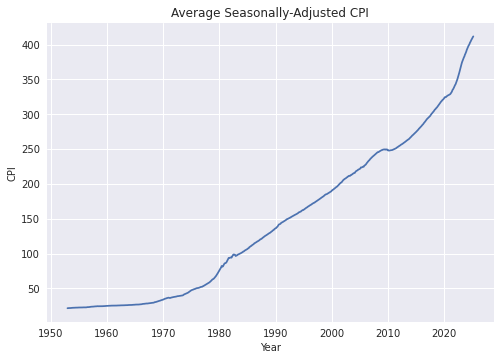

In [465]:
#Create linechart for CPI over time
pp.style.use('seaborn')
pp.plot(cpi['date'].dt.date, cpi['cpi'])
pp.xlabel('Year', fontsize=10)
pp.ylabel('CPI', fontsize=10)
pp.title('Average Seasonally-Adjusted CPI')

In [466]:
#In order to plot HPI and CPI together, they must use the same baseline -- normalize HPI to match CPI
#Find baseline CPI (confirmed with source documentation)
cpi[cpi['cpi'].round() == 100]

,date,cpi
367,1983-08-01,99.6
368,1983-09-01,100.1
369,1983-10-01,100.3


In [467]:
scale_factor = float(100 / (means[means['Year'] == 1984]['Mean Index']))
means['Mean Index'] *= scale_factor

In [468]:
#Convert integer years to datetime objects for comparison
means['Year'] = pd.to_datetime(means['Year'], format="%Y")

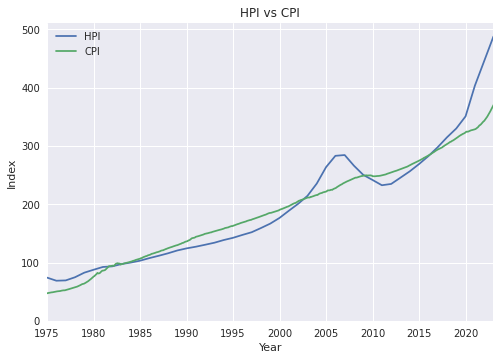

In [469]:
pp.plot(means['Year'], means['Mean Index'], label="HPI")
pp.plot(cpi['date'], cpi['cpi'], label="CPI")
pp.legend(loc='upper left')
pp.xlim(pd.to_datetime('1975', format='%Y'), pd.to_datetime('2023', format='%Y'))
pp.xlabel("Year")
pp.ylabel("Index")
pp.title("HPI vs CPI")
pp.savefig("overlap.svg")

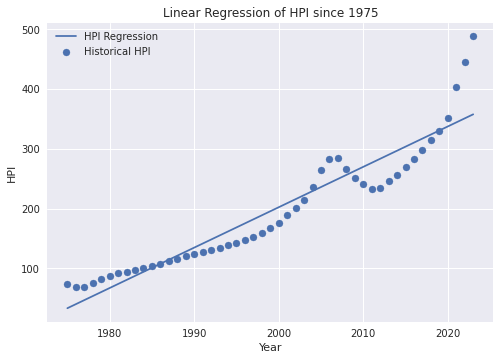

In [504]:
#Generate line of best fit for HPI
HPIlinearCoefficients = np.polyfit(np.array(means['Year'].dt.year), np.array(means['Mean Index']), 1)
fitFunction_HPI = np.poly1d(HPIlinearCoefficients)
#pp.plot(means['Year'].dt.year, means['Mean Index'], fit(means['Year'].dt.year))
hpi_fit = pd.DataFrame({"projected" : fitFunction_HPI(means['Year'].dt.year), "year" : means['Year'].dt.year})
pp.plot(hpi_fit['year'], hpi_fit['projected'], label="HPI Regression")
pp.scatter(means['Year'].dt.year, means['Mean Index'], label="Historical HPI")
pp.title("Linear Regression of HPI since 1975")
pp.xlabel("Year")
pp.ylabel("HPI")
pp.legend()
pp.savefig("HPIRegression.svg")

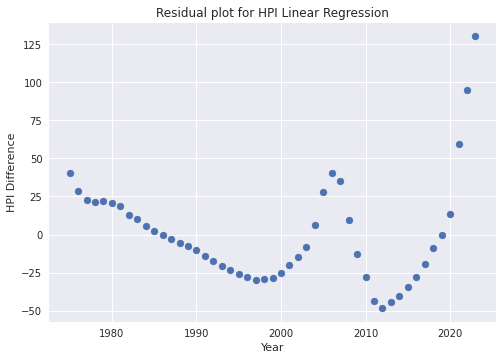

In [480]:
#Generate residual plot for HPI regression
pp.scatter(hpi_fit['year'], means['Mean Index'] - hpi_fit['projected'])
pp.title("Residual plot for HPI Linear Regression")
pp.xlabel("Year")
pp.ylabel("HPI Difference")
pp.savefig("HPIResidual.svg")

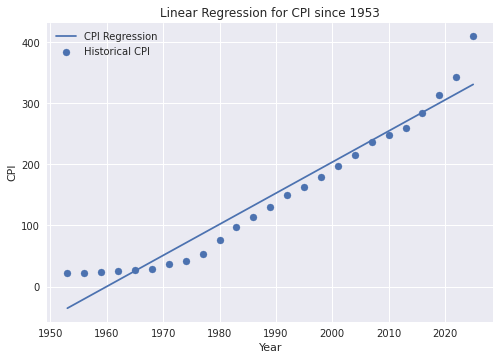

In [505]:
#Generate line of best fit for CPI
CPIlinearCoefficients = np.polyfit(np.array(cpi['date'].dt.year), np.array(cpi['cpi']), 1)
fitFunction_CPI = np.poly1d(linearCoefficients)
cpi_fit = pd.DataFrame({"projected" : fitFunction_CPI(cpi['date'].dt.year), "year" : cpi['date'].dt.year})
pp.plot(cpi_fit['year'], cpi_fit['projected'], label="CPI Regression")
#plot the actual CPI every 36 months
pp.scatter(cpi[cpi['date'].index % 36 == 0]['date'].dt.year, cpi[cpi['cpi'].index % 36 == 0]['cpi'], label="Historical CPI")
pp.title("Linear Regression for CPI since 1953")
pp.xlabel("Year")
pp.ylabel("CPI")
pp.legend()
pp.savefig("CPIRegression.svg")

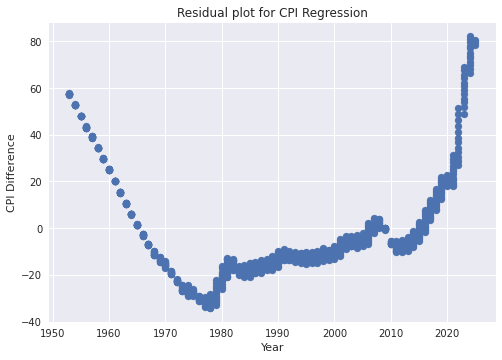

In [484]:
#Generate residual plot for CPI regression
pp.scatter(cpi_fit['year'], cpi['cpi'] - cpi_fit['projected'])
pp.title("Residual plot for CPI Regression")
pp.xlabel("Year")
pp.ylabel("CPI Difference")
pp.savefig("CPIResidual.svg")

In [510]:
#Calculate projections for 2030
HPI_2030 = fitFunction_HPI(2030)
CPI_2030 = fitFunction_CPI(2030)
print("HPI Prediction for 2030: ", HPI_2030.round())
print("CPI Prediction for 2030: ", CPI_2030.round())
print("Difference in slope between HPI and CPI models: ", (HPIlinearCoefficients[0] - CPIlinearCoefficients[0]).round())

HPI Prediction for 2030:  405.0
CPI Prediction for 2030:  357.0
Difference in slope between HPI and CPI models:  2.0
